# Neural Networks and Deep Learning
### CA1 - Question 3
### Written by Babak Hosseini Mohtasham 810101408 1403/12

**Table of contents**<a id='toc0_'></a>    
- [EDA and preprocessing](#toc1_)    
- [Implementing Adaline](#toc2_)    
- [Decision boundary](#toc3_)    
- [History](#toc4_)    
- [Train models on nonlinearly separable features](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)

# <a id='toc1_'></a>[EDA and preprocessing](#toc0_)

In [1034]:
iris = load_iris()

In [1035]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [1036]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [1037]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.sample(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0


In [1038]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [1039]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [1040]:
original_df = df.copy()

In [1041]:
df.drop(df[df['species']==2].index, inplace=True)

In [1042]:
df.duplicated().sum()

0

In [1043]:
df['species'] = df['species'].replace(to_replace= [0, 1], value = [-1, 1])

In [1044]:
df = df[['petal length (cm)','petal width (cm)','species']]

In [1045]:
df.duplicated().sum()

42

In [1046]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
normalizer = MinMaxScaler()
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.transform(X_test)

# <a id='toc2_'></a>[Implementing Adaline](#toc0_)

In [1048]:
def adaline(X, y, learning_rate, num_epochs):
  X = np.hstack((X, np.ones(X.shape[0]).reshape(-1, 1)))

  def delta(X,y,learning_rate, num_epochs):
    W = np.random.random((num_epochs+1, X.shape[1]))
    Loss = np.zeros(num_epochs+1)
    Accuracy = np.zeros(num_epochs+1)

    for i in range(1, num_epochs+1):
      W[i, :] = W[i-1, :]
      for j,x in enumerate(X):
        net = x @ W[i,:]
        W[i,:] += learning_rate * (y[j] - net) * x
        Loss[i] += (y[j] - net)**2
        Accuracy[i] += (y[j] == (1 if net >= 0 else -1))

      Loss[i] /= X.shape[0]
      Accuracy[i] /= X.shape[0]
    return W[1:,:], Loss[1:], Accuracy[1:]

  if y.ndim==1:
    return delta(X,y,learning_rate, num_epochs)

  W, Loss, Accuracy = delta(X,y[:,0],learning_rate, num_epochs)
  W = W.reshape((1,-1,W.shape[1]))

  for i in range(1, y.shape[1]):
    W_new, Loss_new, Accuracy_new = delta(X, y[:,i], learning_rate, num_epochs)
    W = np.vstack((W, W_new.reshape((1, -1, W_new.shape[1]))))
    Loss = np.vstack((Loss, Loss_new))
    Accuracy = np.vstack((Accuracy, Accuracy_new))
  return W, Loss, Accuracy

In [1049]:
W1, Loss1, Accuracy1 = adaline(X_train, y_train, 0.02, 10)

In [1050]:
W2, Loss2, Accuracy2 = adaline(X_train, y_train, 0.005, 10)

In [ ]:
W3, Loss3, Accuracy3 = adaline(X_train, y_train, 0.001, 10)

# <a id='toc3_'></a>[Decision boundary](#toc0_)

w1 * x1 + w2 * x2 + b = 0 -> x2 = (-w1 * x1 - b) / w2

In [1052]:
def plot_decision_boundary(X,y,W1,W2,W3,label1,label2):
  fig, ax = plt.subplots()

  scatter1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label=label1, s=50)
  scatter2 = ax.scatter(X[y == -1, 0], X[y == -1, 1], label=label2, s=50)
  legend1 = ax.legend(handles=[scatter1, scatter2], loc='upper left')

  t = np.array([X[:,0].min(),X[:,0].max()])
  line1, = ax.plot(t, (-W1[-1, 0] * t - W1[-1, -1]) / W1[-1, 1], 'r-', label='lr=0.02')
  line2, = ax.plot(t, (-W2[-1, 0] * t - W2[-1, -1]) / W2[-1, 1], 'g-', label='lr=0.005')
  line3, = ax.plot(t, (-W3[-1, 0] * t - W3[-1, -1]) / W3[-1, 1], 'b-', label='lr=0.001')
  ax.legend(handles=[line1, line2, line3], loc='center left')

  ax.add_artist(legend1)
  plt.xlabel(iris.feature_names[0])
  plt.ylabel(iris.feature_names[1])
  plt.title('Dcision boundary for the three models')
  plt.show()

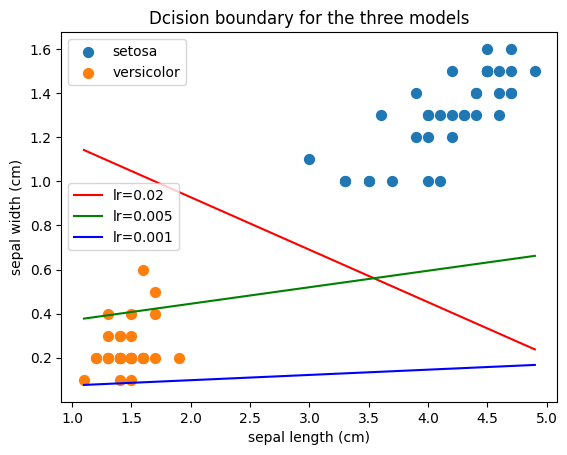

In [1053]:
plot_decision_boundary(X_train,y_train,W1,W2,W3,iris.target_names[0],iris.target_names[1])

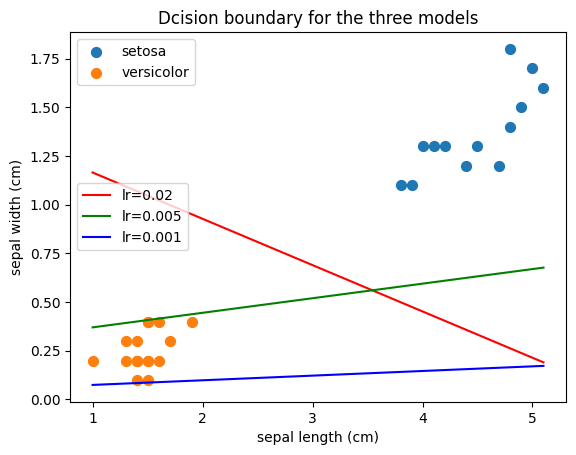

In [ ]:
plot_decision_boundary(X_test,y_test,W1,W2,W3,iris.target_names[0],iris.target_names[1])

# <a id='toc4_'></a>[History](#toc0_)

In [1055]:
def plot_history(hist1,hist2,hist3,title):
  plt.plot(hist1)
  plt.plot(hist2)
  plt.plot(hist3)
  plt.legend(['lr=0.02','lr=0.005', 'lr=0.001'])
  plt.xlabel('epoch')
  plt.ylabel(title)
  plt.title('History of the three models')
  plt.show()

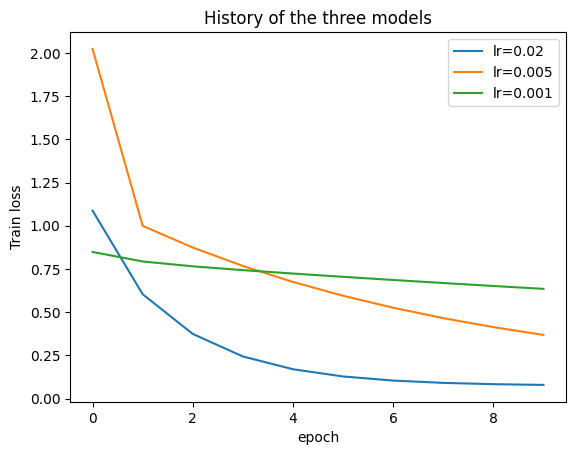

In [1056]:
plot_history(Loss1,Loss2,Loss3,'Train loss')

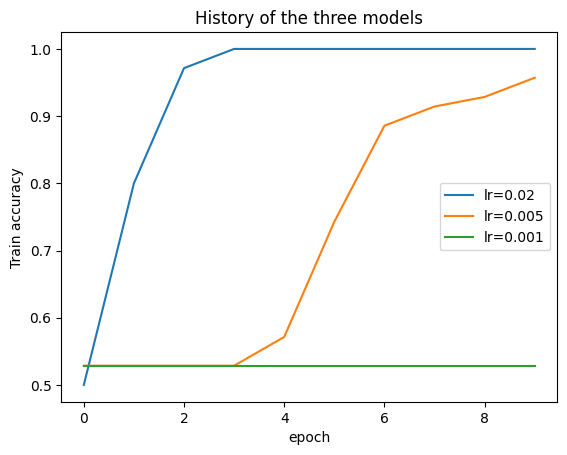

In [1057]:
plot_history(Accuracy1,Accuracy2,Accuracy3,'Train accuracy')

In [1058]:
def loss_accuracy(X, y, W):
    X = np.hstack((X, np.ones(X.shape[0]).reshape(-1, 1)))
    net = X @ W.T
    y = y[:, np.newaxis]
    Loss = ((y - net)**2).mean(axis=0)
    prediction = np.where(net >= 0, 1, -1)
    Accuracy = (prediction == y).mean(axis=0)
    return Loss, Accuracy

In [1059]:
val_loss1, val_acc1 = loss_accuracy(X_test, y_test, W1)
val_loss2, val_acc2 = loss_accuracy(X_test, y_test, W2)
val_loss3, val_acc3 = loss_accuracy(X_test, y_test, W3)

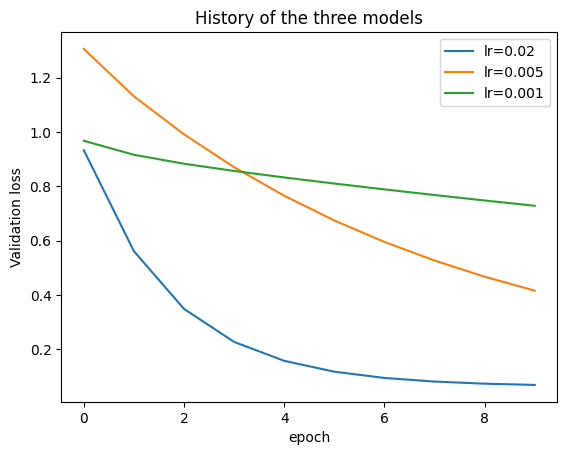

In [1060]:
plot_history(val_loss1,val_loss2,val_loss3,'Validation loss')

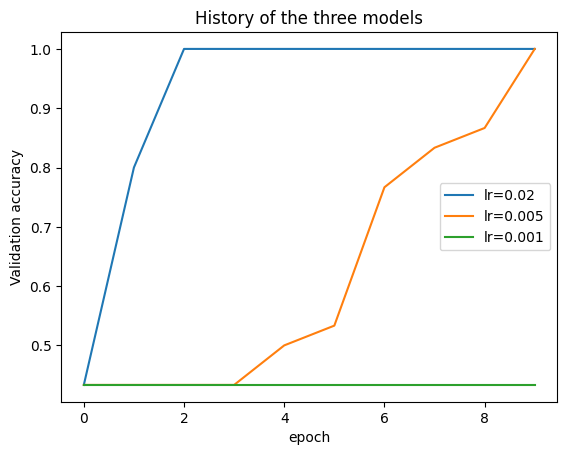

In [1061]:
plot_history(val_acc1,val_acc2,val_acc3,'Validation accuracy')

In [1062]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_curve,auc
import seaborn as sns

In [1063]:
def evaluate(predictions, actual_values):
    print(f"Accuracy: {round(accuracy_score(actual_values,predictions),3)}")
    print(f"Precision: {round(precision_score(actual_values,predictions),3)}")
    print(f"Recall: {round(recall_score(actual_values,predictions),3)}")
    print(f"F1 score: {round(f1_score(actual_values,predictions),3)}")
    matrix=confusion_matrix(actual_values,predictions)
    sns.heatmap(matrix, annot=True, cmap="flare")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()

In [1064]:
def predict(W,X):
    X = np.hstack((X, np.ones(X.shape[0]).reshape(-1, 1)))
    net = X @ W.T
    return np.where(net >= 0, 1, -1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


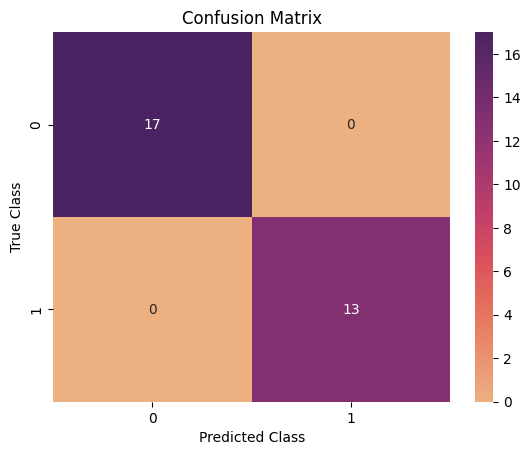

In [1065]:
evaluate(predict(W1[-1],X_test),y_test)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


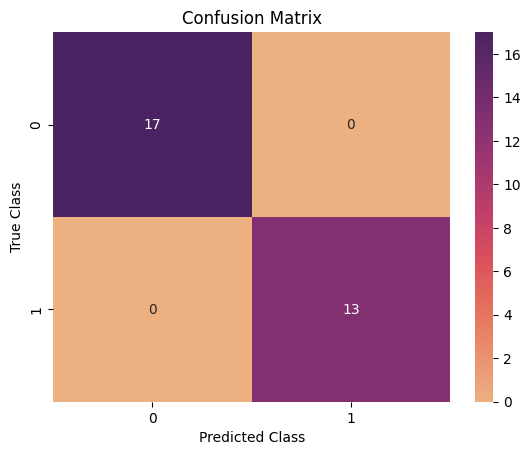

In [1066]:
evaluate(predict(W2[-1],X_test),y_test)

Accuracy: 0.433
Precision: 0.433
Recall: 1.0
F1 score: 0.605


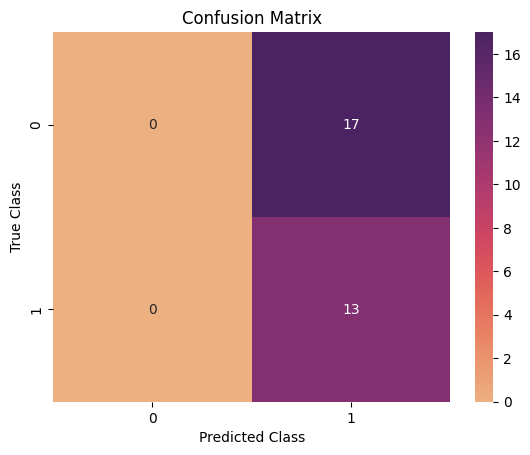

In [ ]:
evaluate(predict(W3[-1],X_test),y_test)

# <a id='toc5_'></a>[Train models on nonlinearly separable features](#toc0_)

In [1068]:
df = original_df.iloc[:,[2,3,-1]]
df.drop(df[df['species']==0].index, inplace=True)
df['species'] = df['species'].replace(to_replace= [1, 2], value = [-1, 1])

<ipython-input-1068-08ab6fb8496b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['species']==0].index, inplace=True)
<ipython-input-1068-08ab6fb8496b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = df['species'].replace(to_replace= [1, 2], value = [-1, 1])


In [1069]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [1070]:
normalizer = MinMaxScaler()
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.transform(X_test)

In [1071]:
epochs=10
W1, Loss1, Accuracy1 = adaline(X_train, y_train, 0.02, epochs)
W2, Loss2, Accuracy2 = adaline(X_train, y_train, 0.005, epochs)
W3, Loss3, Accuracy3 = adaline(X_train, y_train, 0.005, epochs)

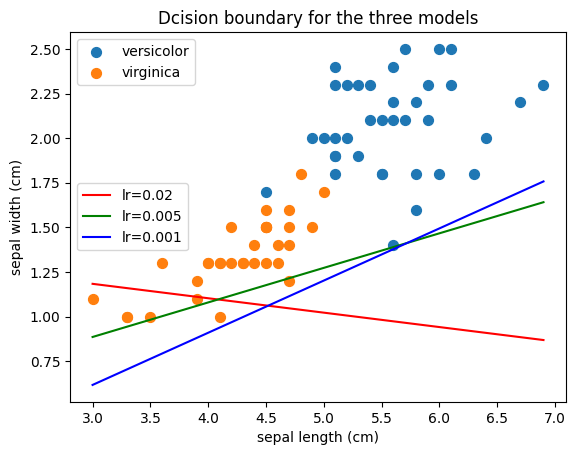

In [1072]:
plot_decision_boundary(X_train,y_train,W1,W2,W3,iris.target_names[1],iris.target_names[2])

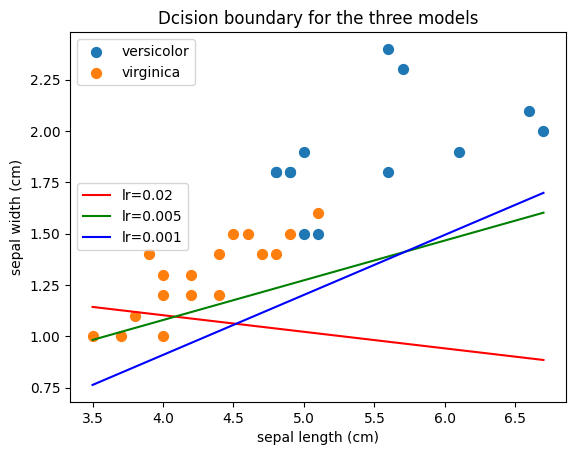

In [1073]:
plot_decision_boundary(X_test,y_test,W1,W2,W3,iris.target_names[1],iris.target_names[2])

In [1074]:
epochs=100
W1, Loss1, Accuracy1 = adaline(X_train, y_train, 0.02, epochs)
W2, Loss2, Accuracy2 = adaline(X_train, y_train, 0.005, epochs)
W3, Loss3, Accuracy3 = adaline(X_train, y_train, 0.005, epochs)

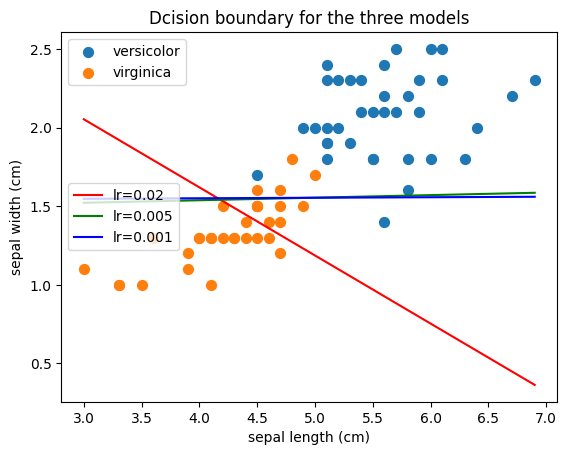

In [1075]:
plot_decision_boundary(X_train,y_train,W1,W2,W3,iris.target_names[1],iris.target_names[2])

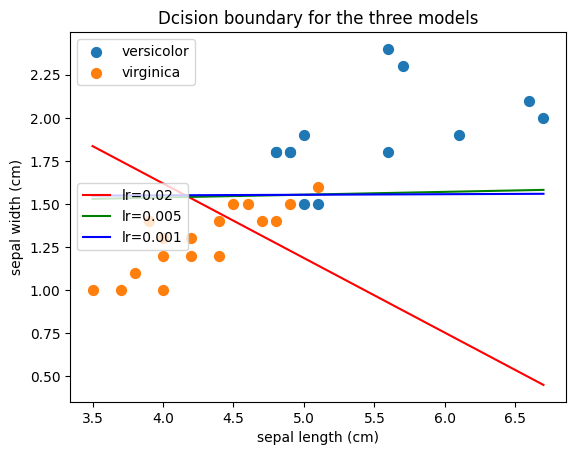

In [1076]:
plot_decision_boundary(X_test,y_test,W1,W2,W3,iris.target_names[1],iris.target_names[2])

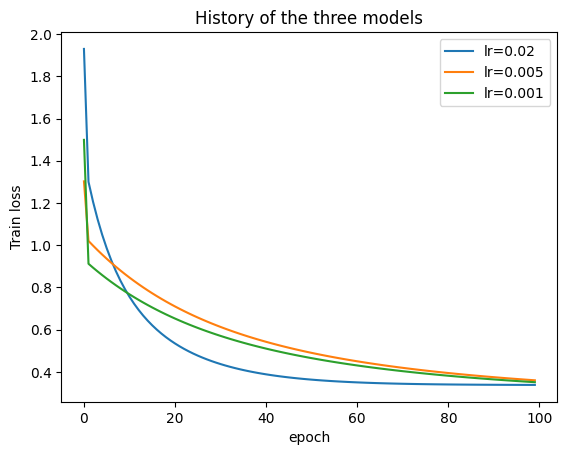

In [1077]:
plot_history(Loss1,Loss2,Loss3,'Train loss')

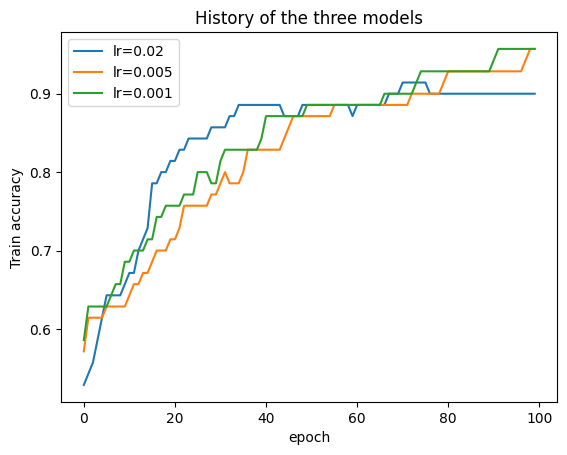

In [1078]:
plot_history(Accuracy1,Accuracy2,Accuracy3,'Train accuracy')